In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('../data/omnipath/interactions.txt',sep='\t',header=0,index_col=None)

In [3]:
fil1=data['source'].apply(lambda x:'COMPLEX' in x)
fil2=data['target'].apply(lambda x:'COMPLEX' in x)
fil=fil1|fil2

In [4]:
complex_dict={}
for c in data.columns:
    complex_dict[c]=[]
for i in data[fil].index:
    temp=data.loc[i]
    s,t=temp[:2]
    if 'COMPLEX' in s:
        s=s[8:].split('-')
    else:
        s=[s]
    if 'COMPLEX' in t:
        t=t[8:].split('-')
    else:
        t=[t]
    for t_temp in t:
        for s_temp in s:
            complex_dict['target'].append(t_temp)
            complex_dict['source'].append(s_temp)
            complex_dict['is_directed'].append(temp[2])
            complex_dict['is_stimulation'].append(temp[3])
            complex_dict['is_inhibition'].append(temp[4])
            complex_dict['consensus_direction'].append(temp[5])
            complex_dict['consensus_stimulation'].append(temp[6])
            complex_dict['consensus_inhibition'].append(temp[7])
            complex_dict['dip_url'].append(temp[8])

In [5]:
data=data[~fil]
data_compex=pd.DataFrame(index=range(len(complex_dict['target'])),columns=data.columns)
for c in data.columns:
    data_compex[c]=complex_dict[c]

In [6]:
data=pd.concat([data,data_compex])
data.index=range(len(data))

In [73]:
data.to_csv('../data/interactions_complex.csv',sep=',')

In [93]:
data=pd.read_csv('../data/interactions_complex.csv',sep=',',header=0,index_col=0)

In [94]:
anno=pd.read_csv('../data/uniprot_symbol.csv',sep=',',header=0,index_col=0)

fil=~pd.isnull(anno['hgnc_symbol'])
anno=anno[fil]

anno=anno.drop_duplicates('uniprotswissprot')
anno=anno.drop_duplicates('hgnc_symbol')

anno.index=anno['uniprotswissprot']
anno=anno['hgnc_symbol']

In [95]:
data_translated=data.copy()
data_translated['target']=data['target'].map(anno)
data_translated['source']=data['source'].map(anno)

In [96]:
fil=data_translated['source'].isnull()
indexes=data_translated.index[fil]
data_translated.loc[indexes,'source']=data.loc[indexes,'source']
fil=data_translated['target'].isnull()
indexes=data_translated.index[fil]
data_translated.loc[indexes,'target']=data.loc[indexes,'target']

In [98]:
data_translated.to_csv('../data/interactions_translated.csv',sep=',')

In [126]:
data_translated=pd.read_csv('../data/interactions_translated.csv',sep=',',header=0,index_col=0)

In [8]:
data_translated=data.copy()

In [9]:
data_translated_rev=data_translated.copy()
data_translated_rev['target']=data_translated['source']
data_translated_rev['source']=data_translated['target']

In [10]:
data=pd.concat([data_translated,data_translated_rev])

In [11]:
data=data.drop_duplicates(['target','source'])

In [12]:
data

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,dip_url
0,P17612,P55064,1,0,0,1,0,0,NaN
1,P55064,Q9HBA0,0,0,0,0,0,0,NaN
2,O43318,Q00610,1,0,0,1,0,0,NaN
3,P14672,Q00610,1,0,0,1,0,0,NaN
4,Q00610,P14672,1,0,0,1,0,0,NaN
5,P12931,Q00610,1,1,0,1,1,0,NaN
6,O95166,Q00610,0,0,0,0,0,0,NaN
7,P41279,Q00610,1,0,0,1,0,0,NaN
8,P10721,Q00610,1,0,0,1,0,0,NaN
9,Q00610,P10721,1,0,0,1,0,0,NaN


In [13]:
all_proteins=list(set(data['source'])|set(data['target']))

In [14]:
all_proteins=pd.Series(range(len(all_proteins)),index=all_proteins)

In [15]:
x=list(all_proteins[data['source']].values.astype(int))
y=list(all_proteins[data['target']].values.astype(int))

In [16]:
l=len(all_proteins)
A=np.zeros((l,l),int)

In [18]:
A[x,y]=1

In [25]:
p

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
adjacency = np.asmatrix(A)
n = adjacency.shape[0]
degree = adjacency.sum(axis=1)
p = adjacency / degree
c = np.eye(n)


In [21]:
for i in range(10):
    c = np.dot(c, p) + np.eye(n)

In [138]:
c=pd.DataFrame(c,index=all_proteins.index,columns=all_proteins.index)

In [173]:
(c.loc['BRAF']-c.loc['AKT3']).abs().sum()

6.7178140144032055

In [104]:
np.sum(A[1,:]!=A[:,2])

84

In [107]:
p.shape

(10846, 10846)

In [111]:
A=np.array([[0,0,1],[0,0,1],[1,1,0]])

In [124]:
np.sum(np.abs((c[:,1]-c[:,2])))

7.5

In [125]:
c

matrix([[3.5, 2.5, 5. ],
        [2.5, 3.5, 5. ],
        [2.5, 2.5, 6. ]])

In [2]:
import numpy as np
from numpy.linalg import inv
from scipy.spatial.distance import pdist, squareform

def calculator(adjacency, nRw):
	# This function can replace the calculator() function in the calcDSD.py file
    # This is the original function in the calcDSD.py file (for comparison purposes)

    """
    adjacency - adjacency matrix represented as a numpy array
                assumes graph is fully connected.
    nRW - the length of random walks used to calculate DSD
          if nRW = -1, then calculate DSD at convergence
    returns DSD matrix represented as a numpy array
    """
    adjacency = np.asmatrix(adjacency)
    n = adjacency.shape[0]
    degree = adjacency.sum(axis=1)
    p = adjacency / degree
    if nRw >= 0:
        c = np.eye(n)
        for i in xrange(nRw):
            c = np.dot(c, p) + np.eye(n)
        return squareform(pdist(c,metric='cityblock'))
    else:
        pi = degree / degree.sum()
        return squareform(pdist(inv(np.eye(n) - p - pi.T),metric='cityblock'))

In [9]:
adjacency=np.random.choice([1,0],(10000,10000))
n = adjacency.shape[0]
degree = adjacency.sum(axis=1)
p = adjacency / degree
c = np.eye(n)

In [13]:
c = np.dot(c, p) + np.eye(n)

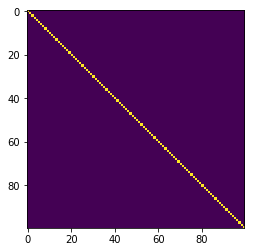

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
c.shape

(10000, 10000)

In [ ]:
squareform(pdist(c,metric='cityblock')).shape

(array([6.00000e+01, 1.78500e+03, 1.97610e+04, 9.03220e+04, 1.77533e+05,
        1.49021e+05, 5.26500e+04, 7.84700e+03, 5.06000e+02, 1.50000e+01]),
 array([2.85345843, 2.88395067, 2.9144429 , 2.94493513, 2.97542737,
        3.0059196 , 3.03641184, 3.06690407, 3.09739631, 3.12788854,
        3.15838078]),
 <a list of 10 Patch objects>)

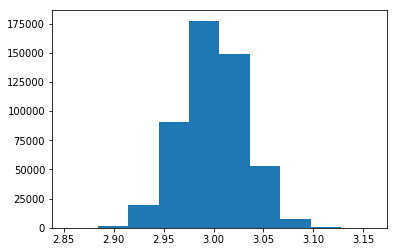

In [255]:
plt.hist(pdist(c,metric='cityblock'))